<a href="https://colab.research.google.com/github/JeongCheolHee/colab/blob/main/%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
  #점진적인 학습
  #확률적 경사 하강법 가파른 길을 조금씩 천천히
  #손실함수 : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 
  #손실함수 값을 찾기 위해 경사 하강법 사용 - 손실함수는 미분이 가능해야함 즉 정확도를 손실함수로 사용하기에는 무리가 있음
  #로지스틱 손실 함수 : 양성 클래스(타킷 =1)일 땐 -log(예측확률), 음성 클래스(타킷 = 0)일 땐 -log(1-예측확률)
  #이진 분류 : 로지스틱 손실 함수 사용 , 다중 분류 : 크로스엔트로피 손실 함수 사용

In [4]:
#경사 하강법을 사용한 분류 모델
#SGDClassifier
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

#훈련세트와 데트스 세트의 특성을 표준화 전처리 (주의 : 훈련세트에서 학습한 통계값으로 테스트 세트도 변환해야 함)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
#경사하강법을 제공하는 클래스
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42) # loss = log (손실함수 = 로지스틱)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#ConvergenceWarning: 모델이 충분히 수렴하지 않았다는 경고 이럴 땐 max_iter 매개변수의 값을 늘려 주는 것이 좋다

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [21]:
#확률적 경사 하강법은 점진적 학습이 가능하므로 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련 가능 partial_fit()메서드를 사용하면 호출할 때마다 1 에포크씩 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.9


In [24]:
#에포크와 과대/과소적합
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  train_score.append(sc.score(test_scaled, test_target)) #append함수를 통해 score list안에 300번의 에포크 결과값 대입

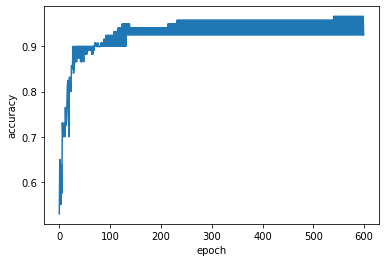

In [39]:
import matplotlib.pyplot as plt
?plt.plot
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [43]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 훈련이 자동으로 멈춤
#tol 향상될 최솟값을 지정하기 때문에 None으로 설정을 해둬야 100번 반복할때까지 자동으로 멈추지 않음

0.957983193277311
0.925
